### In this project, I rehearse what I have done and learned since May 2020 in classifying images of digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()

In [2]:
# Have a look at its attributes
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

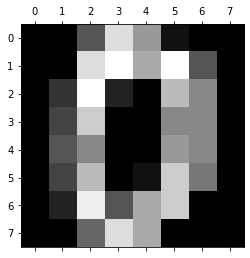

In [3]:
# Show an image example
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.images[0])

In [4]:
# Return the true values of images from 0 to 4
digits.target[:5]

array([0, 1, 2, 3, 4])

In [5]:
# Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=1)

# Normalize training and test data sets
X_train /= 16
X_test /= 16

from tensorflow.keras.utils import to_categorical
# One-hot encode y_train and y_test
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
X_train[0].shape

(64,)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# Create the keras tuner model.
def build_model(hp):
#     hp_filters = hp.Int('filters', min_value=16, max_value=128, step=16)
#     hp_drop_out = hp.Float('dropout', 0, 0.5, step=0.1)
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation=tf.nn.leaky_relu, input_shape=(64,)))
#         model.add(BatchNormalization())
#         model.add(Dropout(hp_drop_out))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
from kerastuner.tuners import BayesianOptimization
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=15)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [9]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [11]:
model = tuner.get_best_models(num_models=1)[0]

In [12]:
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test), verbose=0, callbacks=[es])

In [13]:
y_pred = model.predict(x=X_test, batch_size=16, verbose=0)
y_pred = np.argmax(y_pred, axis=1)

In [14]:
y_pred

array([2, 6, 5, 8, 5, 5, 3, 6, 5, 4, 8, 5, 7, 4, 0, 9, 1, 1, 2, 5, 5, 7,
       2, 8, 6, 3, 7, 3, 8, 0, 2, 0, 5, 4, 8, 0, 2, 7, 4, 2, 6, 2, 3, 2,
       6, 1, 4, 8, 7, 8, 7, 2, 3, 7, 8, 7, 1, 1, 3, 1, 3, 7, 6, 5, 9, 2,
       0, 6, 4, 9, 5, 5, 8, 1, 5, 7, 2, 6, 7, 9, 2, 3, 9, 5, 4, 7, 4, 7,
       0, 5, 3, 6, 9, 5, 9, 7, 7, 6, 7, 1, 0, 7, 6, 9, 7, 8, 4, 1, 6, 6,
       4, 9, 8, 3, 4, 5, 8, 4, 1, 7, 9, 0, 1, 5, 4, 1, 9, 1, 4, 2, 0, 4,
       1, 0, 5, 8, 0, 3, 5, 8, 0, 6, 4, 4, 8, 9, 3, 7, 8, 3, 6, 2, 6, 5,
       3, 5, 9, 6, 3, 0, 6, 6, 8, 1, 2, 6, 8, 7, 1, 9, 0, 0, 5, 2, 9, 2,
       9, 8, 3, 8, 0, 7, 1, 0, 6, 3, 9, 3, 1, 1, 9, 2, 9, 0, 9, 5, 0, 0,
       7, 8, 7, 4, 4, 0, 1, 9, 6, 4, 9, 3, 8, 5, 8, 0, 1, 3, 1, 5, 4, 1,
       3, 8, 8, 0, 0, 8, 8, 3, 9, 0, 6, 7, 9, 0, 9, 3, 7, 5, 4, 1, 6, 6,
       5, 4, 5, 8, 6, 4, 3, 4, 4, 6, 5, 2, 0, 2, 3, 7, 0, 9, 3, 9, 1, 5,
       9, 5, 2, 2, 9, 3, 9, 6, 9, 9, 3, 1, 7, 6, 7, 6, 6, 3, 7, 0, 1, 9,
       3, 4, 2, 8, 7, 3, 2, 8, 4, 7, 0, 3, 1, 1, 2,

In [15]:
np.argmax(y_test, axis=1, out=None)

array([2, 6, 5, 8, 5, 5, 3, 6, 5, 4, 7, 5, 7, 4, 0, 9, 1, 1, 2, 5, 5, 7,
       2, 8, 6, 3, 7, 3, 8, 0, 2, 0, 5, 4, 8, 0, 2, 7, 4, 2, 6, 2, 3, 2,
       5, 1, 4, 8, 7, 8, 7, 2, 3, 7, 8, 7, 1, 1, 3, 1, 3, 7, 6, 5, 9, 2,
       0, 6, 4, 9, 5, 5, 8, 1, 5, 7, 2, 6, 7, 9, 2, 3, 9, 5, 4, 7, 4, 7,
       0, 5, 3, 6, 9, 5, 9, 7, 7, 6, 7, 1, 0, 7, 6, 9, 7, 8, 4, 1, 6, 6,
       4, 4, 8, 3, 4, 3, 8, 0, 1, 7, 9, 0, 1, 5, 4, 1, 9, 1, 4, 2, 0, 4,
       1, 0, 5, 8, 0, 3, 5, 8, 0, 6, 4, 4, 3, 9, 3, 7, 8, 3, 6, 2, 6, 5,
       3, 5, 9, 6, 3, 0, 6, 6, 8, 1, 2, 6, 8, 7, 1, 9, 0, 0, 5, 2, 9, 2,
       9, 8, 3, 8, 0, 7, 1, 0, 6, 3, 9, 3, 1, 1, 9, 2, 9, 0, 9, 5, 0, 0,
       7, 8, 7, 4, 4, 0, 1, 9, 6, 4, 9, 3, 8, 5, 8, 0, 1, 3, 1, 5, 4, 1,
       3, 8, 8, 0, 0, 8, 8, 3, 9, 0, 6, 7, 5, 0, 9, 3, 7, 5, 4, 8, 6, 6,
       5, 4, 5, 8, 6, 4, 3, 7, 4, 6, 5, 2, 0, 2, 3, 7, 0, 9, 3, 9, 1, 5,
       9, 5, 2, 2, 9, 3, 9, 6, 8, 9, 3, 1, 7, 6, 7, 6, 6, 3, 7, 0, 1, 9,
       3, 4, 2, 8, 7, 3, 2, 8, 4, 7, 0, 3, 1, 1, 2,

In [16]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = np.argmax(y_test, axis=1)

In [18]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.95      0.97        38
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        35
           4       0.94      0.92      0.93        37
           5       0.95      0.97      0.96        36
           6       1.00      0.95      0.97        38
           7       0.94      1.00      0.97        34
           8       0.91      0.94      0.93        34
           9       1.00      0.92      0.96        39

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



### Visually verify if this is a good learning curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


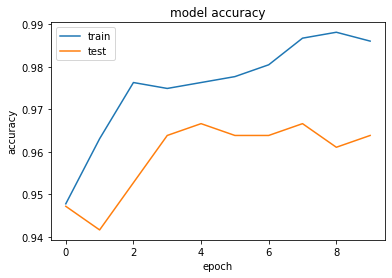

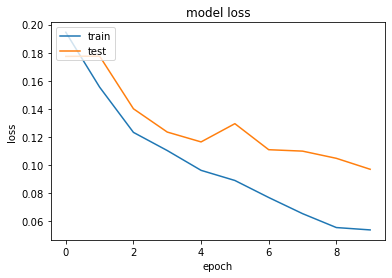

In [19]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()